# AccelerateAI - Data Science Bootcamp

### Simple Linear Regression- Core Concepts :
- Scatter plot & Correlation 
- Data distribution
- Model training
- Model diagnostics
- Saving trained models 

### Case A. Finance - CAPM

In [62]:
import numpy as np
import pandas as pd 

import seaborn as sbn 
import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats
import statsmodels.api as sm

In [63]:
# Read the stockprice data file
stocks_df = pd.read_csv('02_Stockprice.csv')
stocks_df.head()

,Date,AMZN,TSLA,GOOG,sp500
0,02-01-2015,308.519989,219.309998,523.373108,2058.199951
1,05-01-2015,302.190002,210.089996,512.463013,2020.579956
2,06-01-2015,295.290009,211.279999,500.585632,2002.609985
3,07-01-2015,298.420013,210.949997,499.727997,2025.900024
4,08-01-2015,300.459991,210.619995,501.303680,2062.139893


In [64]:
# Sort the data based on Date
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'], format="%d-%m-%Y")
stocks_df.set_index(stocks_df.Date, inplace=True)

In [65]:
stocks_df

,Date,AMZN,TSLA,GOOG,sp500
Date,,,,,
2015-01-02,2015-01-02,308.519989,219.309998,523.373108,2058.199951
2015-01-05,2015-01-05,302.190002,210.089996,512.463013,2020.579956
2015-01-06,2015-01-06,295.290009,211.279999,500.585632,2002.609985
2015-01-07,2015-01-07,298.420013,210.949997,499.727997,2025.900024
2015-01-08,2015-01-08,300.459991,210.619995,501.303680,2062.139893
...,...,...,...,...,...
2020-08-05,2020-08-05,3205.030029,1485.020020,1473.609985,3327.770020
2020-08-06,2020-08-06,3225.000000,1489.579956,1500.099976,3349.159912
2020-08-07,2020-08-07,3167.459961,1452.709961,1494.489990,3351.280029


In [66]:
#Plotting stock Data
fig=px.line(stocks_df,x="Date",y=["AMZN", "TSLA", "GOOG"])
fig.show()

In [67]:
# Let's fill all the gaps in dates 
stocks_df = stocks_df.asfreq("D", method='ffill')
stocks_df.head(10)

,Date,AMZN,TSLA,GOOG,sp500
Date,,,,,
2015-01-02,2015-01-02,308.519989,219.309998,523.373108,2058.199951
2015-01-03,2015-01-02,308.519989,219.309998,523.373108,2058.199951
2015-01-04,2015-01-02,308.519989,219.309998,523.373108,2058.199951
2015-01-05,2015-01-05,302.190002,210.089996,512.463013,2020.579956
2015-01-06,2015-01-06,295.290009,211.279999,500.585632,2002.609985
2015-01-07,2015-01-07,298.420013,210.949997,499.727997,2025.900024
2015-01-08,2015-01-08,300.459991,210.619995,501.303680,2062.139893
2015-01-09,2015-01-09,296.929993,206.660004,494.811493,2044.810059
2015-01-10,2015-01-09,296.929993,206.660004,494.811493,2044.810059


In [68]:
# we need to calculate daily gains for each Stock and then regress them with Index 

def pct_change (df):
    change = (df - df.shift(1))/df
    return change


dailyreturn_df = stocks_df.drop(columns="Date").apply(pct_change)
dailyreturn_df.head()

,AMZN,TSLA,GOOG,sp500
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-03,0.000000,0.000000,0.000000,0.000000
2015-01-04,0.000000,0.000000,0.000000,0.000000
2015-01-05,-0.020947,-0.043886,-0.021290,-0.018618
2015-01-06,-0.023367,0.005632,-0.023727,-0.008973


<AxesSubplot:>

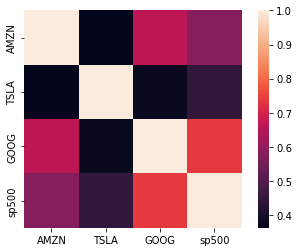

In [69]:
sbn.heatmap(data=dailyreturn_df.corr(),  # our correlation matrix
           square=True)

<AxesSubplot:ylabel='Density'>

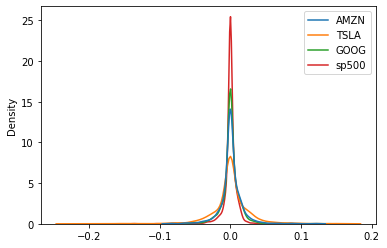

In [70]:
#Check the data distribution 
sbn.kdeplot(data=dailyreturn_df)

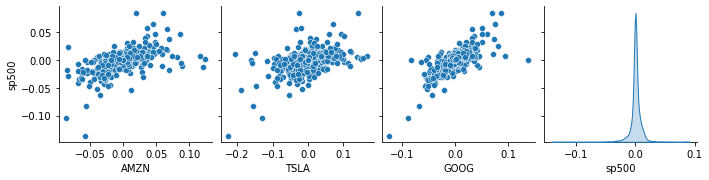

In [71]:
sbn.pairplot(data = dailyreturn_df, 
             y_vars= 'sp500',
             diag_kind='kde')      

In [72]:
dailyreturn_df.head(5)

,AMZN,TSLA,GOOG,sp500
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-03,0.000000,0.000000,0.000000,0.000000
2015-01-04,0.000000,0.000000,0.000000,0.000000
2015-01-05,-0.020947,-0.043886,-0.021290,-0.018618
2015-01-06,-0.023367,0.005632,-0.023727,-0.008973


In [73]:
dailyreturn_df.drop([dailyreturn_df.index[1]], inplace=True)
dailyreturn_df.head(5)

,AMZN,TSLA,GOOG,sp500
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-04,0.000000,0.000000,0.000000,0.000000
2015-01-05,-0.020947,-0.043886,-0.021290,-0.018618
2015-01-06,-0.023367,0.005632,-0.023727,-0.008973
2015-01-07,0.010489,-0.001564,-0.001716,0.011496


In [74]:
# Drop NA values - else can't run regression
filtered_df = dailyreturn_df.dropna()

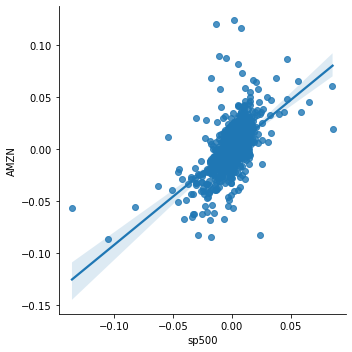

In [75]:
sbn.lmplot(data=filtered_df, x='sp500', y='AMZN')

In [76]:
def least_squares_fit(X, Y):
    """
    Given two vectors X and Y,
    find the least-squares values of b_0 and b_1
    """
    corr, _ = stats.pearsonr(X, Y)
    b_1 = corr*np.std(Y)/np.std(X)
    b_0 = np.mean(Y) - b_1*np.mean(X)
    return b_0, b_1

In [77]:
alpha, beta = least_squares_fit(filtered_df['sp500'], filtered_df['GOOG'])
print('Beta for {} stock is = {} and alpha is = {}'.format('AAPL', round(beta,3), round(alpha,3)))  

Beta for AAPL stock is = 1.033 and alpha is = 0.0


In [78]:
# Expected market return
round(filtered_df["sp500"].mean()*252,3)

0.047

In [79]:
# Expected return for AAPL  

### Case B. HealthCare Studies   

##### Body fat data
The data contain estimates of the percentage of body fat determined by underwater weighing and various body circumference measurements for 252 men.
Accurate measurement of body fat is inconvenient/costly and it is desirable to have easy methods of estimating body fat that are not inconvenient/costly.
The variables in the dataset consist of body measurements 
- Density determined from underwater weighing
- Percent body fat from Siri's (1956) equation
- Age (years)
- Weight (lbs)
- Height (inches)
- Neck circumference (cm)
- Chest circumference (cm)
- Abdomen 2 circumference (cm)
- Hip circumference (cm)
- Thigh circumference (cm)
etc

#### 2. Scatterplot & Correlation  

In [80]:
# Lets see the dataset
bodyfat_df = pd.read_csv("00_Bodyfat.csv")

In [81]:
bodyfat_df.head()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


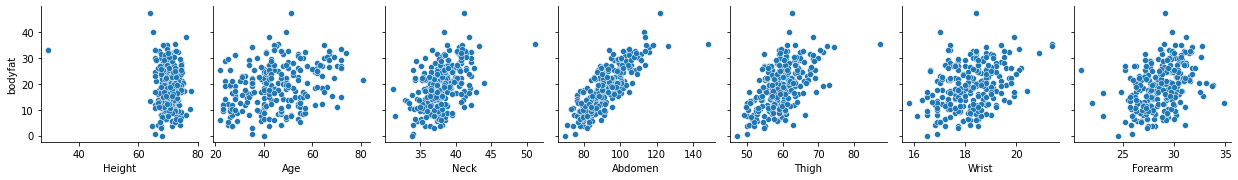

In [82]:
# Lets look at relationship of bodyfat with some of the body characteristics
sbn.pairplot(bodyfat_df,     
             x_vars=["Height", "Age","Neck", "Abdomen", "Thigh", "Wrist",  "Forearm"],
             y_vars=["bodyfat"])

In [83]:
# Correlation of bodyfat with other variables 
bodyfat_df.corr().loc["bodyfat"]

Density   -0.987782
bodyfat    1.000000
Age        0.291458
Weight     0.612414
Height    -0.089495
Neck       0.490592
Chest      0.702620
Abdomen    0.813432
Hip        0.625201
Thigh      0.559608
Knee       0.508665
Ankle      0.265970
Biceps     0.493271
Forearm    0.361387
Wrist      0.346575
Name: bodyfat, dtype: float64

In [84]:
# Retain only the required columns
df = bodyfat_df[['bodyfat', 'Abdomen']]
df.describe()

,bodyfat,Abdomen
count,252.000000,252.000000
mean,19.150794,92.555952
std,8.368740,10.783077
min,0.000000,69.400000
25%,12.475000,84.575000
50%,19.200000,90.950000
75%,25.300000,99.325000
max,47.500000,148.100000


<AxesSubplot:xlabel='bodyfat', ylabel='Density'>

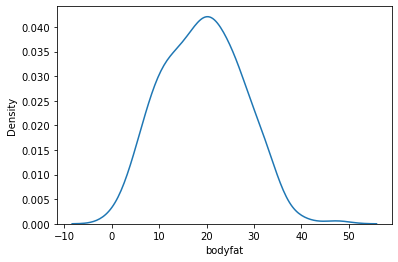

In [85]:
# Distribution of bodyfat 
sbn.kdeplot(x=df.bodyfat)

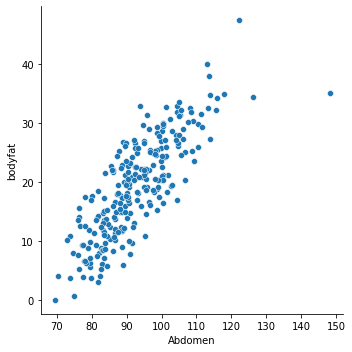

In [86]:
# How is the relationship between the age and bodyfat ?
sbn.relplot(data=df, x="Abdomen", y="bodyfat")

In [87]:
# Correlation 
df.corr()

,bodyfat,Abdomen
bodyfat,1.000000,0.813432
Abdomen,0.813432,1.000000


#### 3. Model Training 

In [88]:
# Triaining a linear regression model for bodyfat ~ Abdomen 

X = df.Abdomen
Y = df.bodyfat

X = sm.add_constant(X) # adding a constant

reg_model = sm.OLS(Y,X).fit()


print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     488.9
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           9.09e-61
Time:                        14:47:38   Log-Likelihood:                -755.90
No. Observations:                 252   AIC:                             1516.
Df Residuals:                     250   BIC:                             1523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.2802      2.660    -14.765      0.0

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



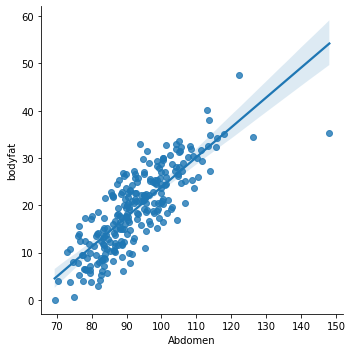

In [89]:
sbn.lmplot(data=df, x='Abdomen', y='bodyfat')
#plt.plot(df.Neck, 0.6313*df.Abdomen -39.2802

#### 4. Model Diagnostics

In [90]:
residuals = reg_model.resid 
residuals.head()

0   -2.206949
1   -7.018079
2    9.088529
3   -4.864514
4    4.849746
dtype: float64

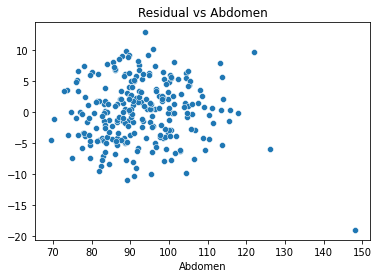

In [91]:
# Residual plot 
fig = sbn.scatterplot(x=df.Abdomen, y=residuals)
fig.set_title("Residual vs Abdomen")
plt.show()

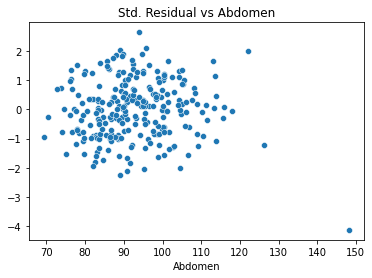

In [92]:
# Standardized residual plot 

#obtain standardized residuals
influence = reg_model.get_influence()
standardized_residuals = influence.resid_studentized_internal

fig = sbn.scatterplot(x=df.Abdomen, y=standardized_residuals)
fig.set_title("Std. Residual vs Abdomen")
plt.show()

D:\anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



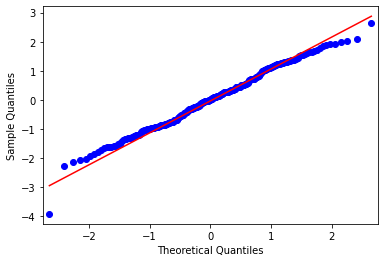

In [93]:
# Q-Q Plot
sm.qqplot(residuals, fit=True, line="q")
plt.show()

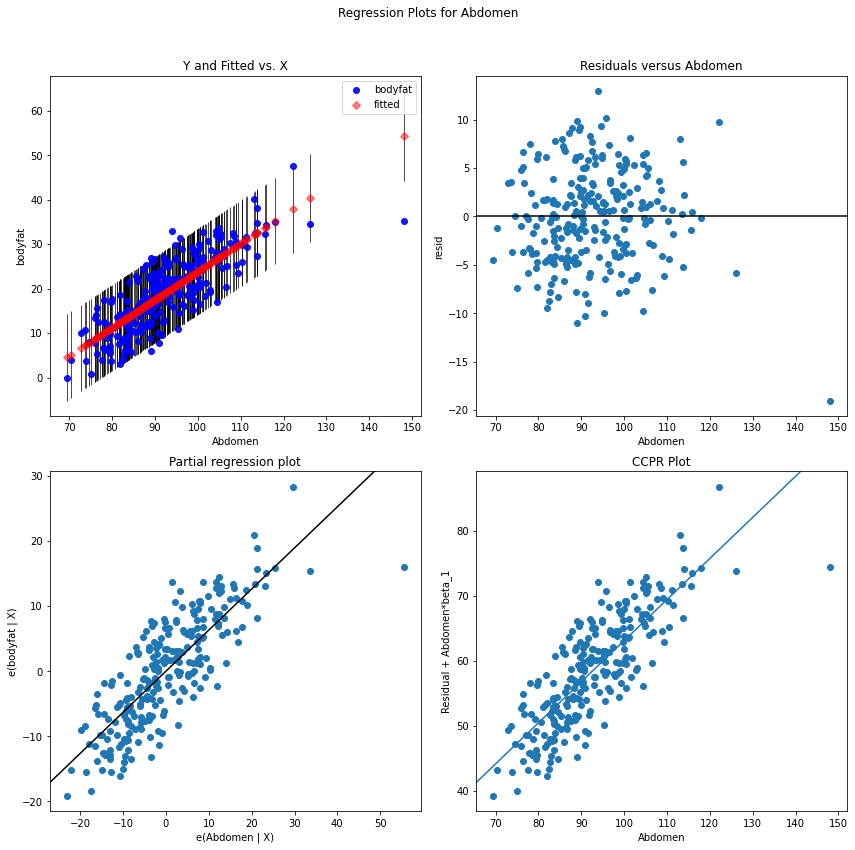

In [94]:
# Define figure size
fig = plt.figure(figsize=(12,12))

# Produce regression plots
fig = sm.graphics.plot_regress_exog(reg_model, 'Abdomen', fig=fig)

In [95]:
y_pred = reg_model.predict(X) 

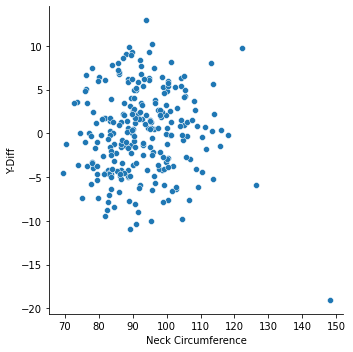

In [96]:
ax = sbn.relplot(x=df.Abdomen, y=Y-y_pred)
ax.set(xlabel='Neck Circumference', ylabel='Y-Diff')
plt.show()

In [97]:
# Prediction Interval 
pred_result = reg_model.get_prediction(X)
pred_ci = pred_result.conf_int(alpha=0.05)         # CI = (1-alpha)*100%
pred_ci[0:5]                        

array([[13.77395791, 15.23993945],
       [12.30880988, 13.9273482 ],
       [15.55213048, 16.87081054],
       [14.56737119, 15.96165669],
       [23.11445605, 24.58605102]])

In [98]:
# Outliers - calculate cook's distance and dffits 
infl = reg_model.get_influence()
sm_fr = infl.summary_frame()

In [99]:
sm_fr.sample(10)

,dfb_const,dfb_Abdomen,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
21,0.047382,-0.059656,7.018810e-03,-1.622497,0.005304,-0.118480,-1.627842,-0.118871
25,-0.124871,0.114562,1.110305e-02,-1.511097,0.009631,-0.149017,-1.515007,-0.149403
99,-0.000492,0.003713,3.910980e-04,0.439141,0.004040,0.027968,0.438431,0.027923
247,-0.030542,0.026978,8.920054e-04,-0.513644,0.006717,-0.042238,-0.512886,-0.042175
119,0.016150,-0.013034,4.712667e-04,0.440033,0.004844,0.030701,0.439323,0.030651
7,-0.026617,0.020479,1.687668e-03,-0.861055,0.004532,-0.058098,-0.860608,-0.058067
54,-0.113653,0.105585,8.445438e-03,-1.197978,0.011632,-0.129965,-1.199026,-0.130079
127,0.142145,-0.131775,1.335528e-02,1.533692,0.011228,0.163434,1.537873,0.163879
124,-0.000145,0.000128,2.139787e-08,-0.002574,0.006418,-0.000207,-0.002569,-0.000206
232,-0.006397,0.005028,8.671681e-05,-0.192706,0.004649,-0.013169,-0.192334,-0.013144


In [100]:
sm_fr.cooks_d.max()                  # Cook's distance greater than 1, are considered influential outliers 

1.0515810077469012

In [101]:
sm_fr.dffits.max()                   # DFFITS greater than {2*sqrt(p/n)} = 0.2 

0.38116050177849337

In [102]:
sm_fr[sm_fr['dffits'] > 0.2]

,dfb_const,dfb_Abdomen,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
35,-0.187619,0.201134,0.025599,1.651307,0.018430,0.226270,1.657063,0.227059
215,-0.340677,0.358141,0.071740,2.022862,0.033876,0.378787,2.035540,0.381161


In [103]:
df1= df.iloc[[35, 215], :]

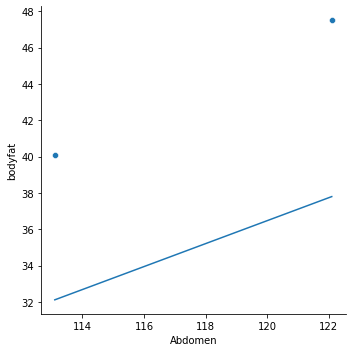

In [104]:
sbn.relplot(data=df1, y='bodyfat', x='Abdomen', )
plt.plot(df1.Abdomen, 0.6313*df1.Abdomen -39.2802)

In [105]:
# Lets drop these 2 point and retrain a linear regression model
updated_df = df.drop([df.index[35], df.index[215]])

In [106]:
X = updated_df.Abdomen
Y = updated_df.bodyfat

X = sm.add_constant(X)   # Adding the constant term

reg_model2 = sm.OLS(Y,X).fit()
print(reg_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     452.4
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           7.73e-58
Time:                        14:47:40   Log-Likelihood:                -747.35
No. Observations:                 250   AIC:                             1499.
Df Residuals:                     248   BIC:                             1506.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.8470      2.688    -14.080      0.0

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



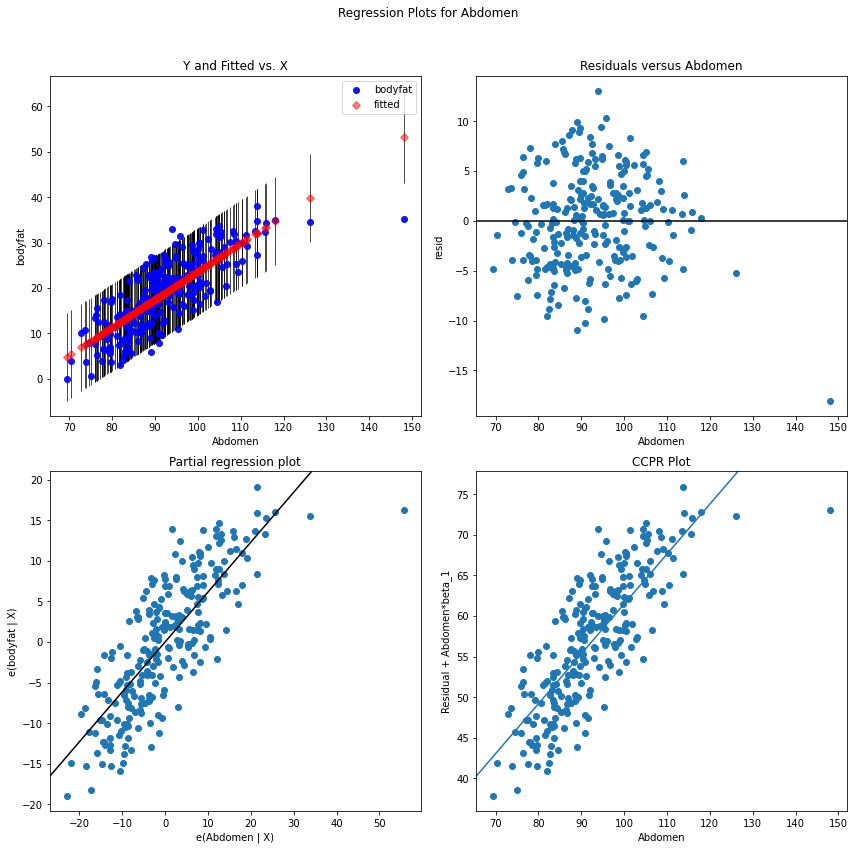

In [107]:
# Define figure size
fig = plt.figure(figsize=(12,12))

# Produce regression plots
fig = sm.graphics.plot_regress_exog(reg_model2, 'Abdomen', fig=fig)

#### 5.  Saving & Loading Models

In [108]:
# Saving a trained model
reg_model2.save("final_reg_model.pickle")

In [109]:
# Loading the saved model 
saved_model = sm.load("final_reg_model.pickle")

In [110]:
print(saved_model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.644    
Dependent Variable: bodyfat          AIC:                1498.6912
Date:               2022-08-21 14:47 BIC:                1505.7341
No. Observations:   250              Log-Likelihood:     -747.35  
Df Model:           1                F-statistic:        452.4    
Df Residuals:       248              Prob (F-statistic): 7.73e-58 
R-squared:          0.646            Scale:              23.311   
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const      -37.8470    2.6879  -14.0804  0.0000  -43.1411  -32.5529
Abdomen      0.6150    0.0289   21.2695  0.0000    0.5581    0.6720
------------------------------------------------------------------
Omnibus:              0.686         Durbin-Watson:           1.802
Prob(Omn